# ABEL linac tracking example

By Carl A. Lindstrøm (University of Oslo), 8 Sep 2023

### Import ABEL framework

In [1]:
import sys
sys.path.append('../')
from abel import *
#from abel.classes.stage.impl.stage_quasistatic_2d import StageQuasistatic2d as stage
import numpy as np
import matplotlib.pyplot as plt

initializing ocelot...


### Define the linac and beams

In [2]:
# define drive bunch
driver = SourceBasic()
driver.charge = -2.7e10 * SI.e # [C]
driver.energy = 31.25e9 # [eV]
driver.rel_energy_spread = 0.01
driver.bunch_length = 50e-6 # [m]
driver.z_offset = 580e-6 # [m]
driver.emit_nx, driver.emit_ny = 10e-6, 10e-6 # [m rad]
driver.beta_x, driver.beta_y = 30e-3, 30e-3 # [m]
driver.num_particles = 100000
driver.symmetrize = True

# define stage
stage = StageHipace()
stage.driver_source = driver
stage.length = 11 # [m]
stage.plasma_density = 2e21 # [m^-3]

# define witness bunch
witness = SourceBasic()
witness.charge = -1e-10 # [C]
witness.energy = 5e9 # [eV]
witness.rel_energy_spread = 0.01
witness.bunch_length = 28e-6 # [m]
witness.z_offset = -160e-6 # [m]
witness.emit_nx, witness.emit_ny = 160e-6, 0.56e-6 # [m rad]
witness.beta_x = stage.matched_beta_function(witness.energy) #10e-3, 10e-3 # [m]
witness.beta_y = witness.beta_x
witness.num_particles = 100000
witness.x_offset, witness.y_offset = 0e-6, 0e-6 # [m]
witness.jitter.x = 0e-6
witness.do_radiation_reaction = True

# define beam delivery system
bds = BeamDeliverySystemBasic()
bds.beta_x = stage.matched_beta_function(witness.energy) # [m]
bds.beta_y = stage.matched_beta_function(witness.energy) # [m]

# define spectrometer
spectrometer = SpectrometerFacetOcelot()
spectrometer.exact_tracking = False
spectrometer.bend_angle = -0.03 # [T]
spectrometer.obj_plane = 0.00 # [m]
spectrometer.mag_x = -4 
spectrometer.img_energy = 13.5e9 # [eV]

# define experiment
experiment = Experiment(witness, bds, stage, spectrometer)

### Run simulations

In [3]:
beam = experiment.run('hipace_example_6', overwrite=True)

Tracking element 1 (s = 0.0 m, -0.10 nC, 5.0 GeV, SourceBasic, stage 0)
Tracking element 2 (s = 0.0 m, -0.10 nC, 5.0 GeV, BeamDeliverySystemBasic, stage 0)
Running job 5057556
>> Starting (0:00)
>> Running (0:03)
>> Running (0:08)
>> Running (0:13)
>> Running (0:19)
>> Running (0:24)
>> Running (0:30)
>> Running (0:35)
>> Running (0:41)
>> Running (0:46)
>> Running (0:51)
>> Running (0:56)
>> Running (1:01)
>> Running (1:06)
>> Running (1:11)
>> Running (1:16)
>> Running (1:21)
>> Running (1:26)
>> Running (1:31)
>> Running (1:36)
>> Running (1:42)
>> Running (1:47)
>> Running (1:52)
>> Running (1:57)
>> Running (2:03)
>> Running (2:08)
>> Running (2:13)
>> Running (2:19)
>> Running (2:24)
>> Running (2:29)
>> Running (2:35)
>> Running (2:40)
>> Running (2:45)
>> Running (2:51)
>> Running (2:56)
>> Running (3:01)
>> Running (3:07)
>> Running (3:12)
>> Running (3:17)
>> Running (3:23)
>> Running (3:28)
>> Running (3:33)
>> Running (3:38)
>> Running (3:43)
>> Running (3:48)
>> Running (3

In [4]:
#beam2 = linac.run('linac_5TeV', num_shots=1, overwrite=False, parallel=False);

### Plot the wakefield

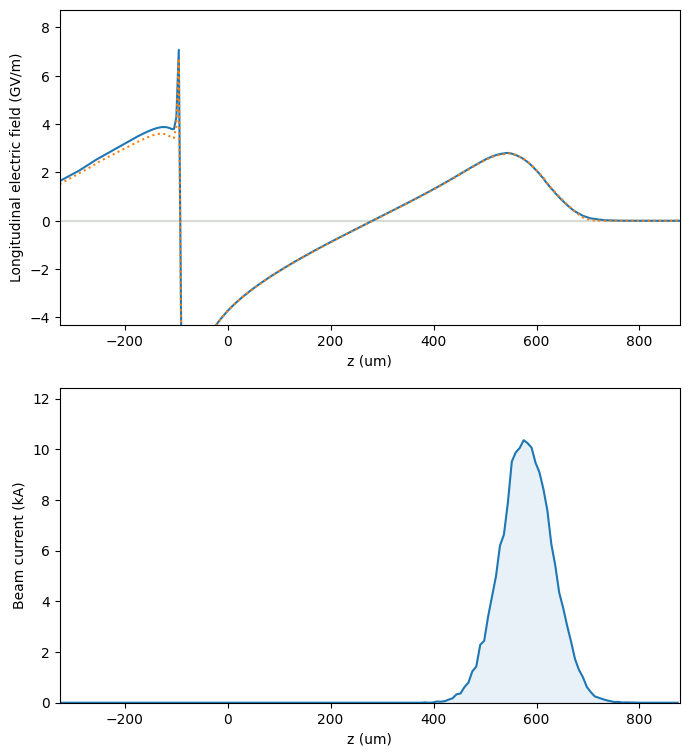

In [5]:
# plot the first-stage wakefield
experiment.stage.plot_wakefield()

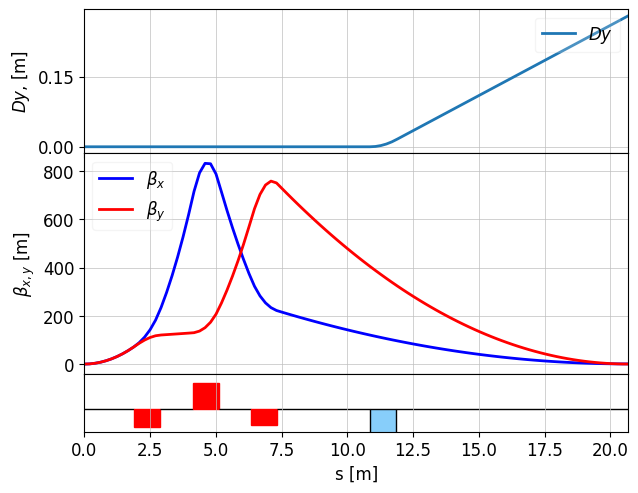

In [6]:
# plot the spectrometer imaging
spectrometer.plot_twiss()

### Plot beam evolution and survey

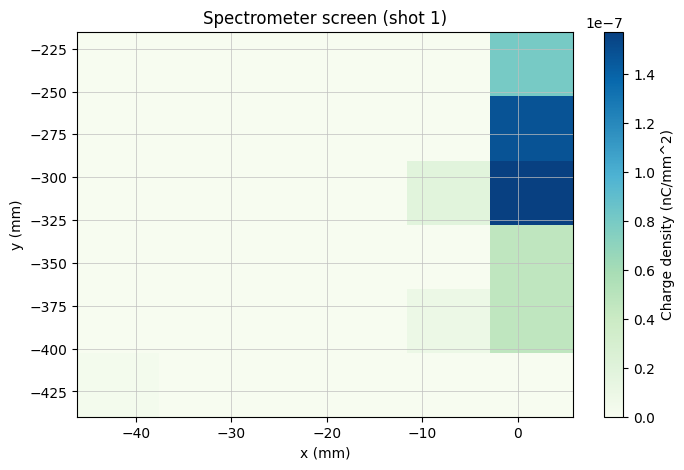

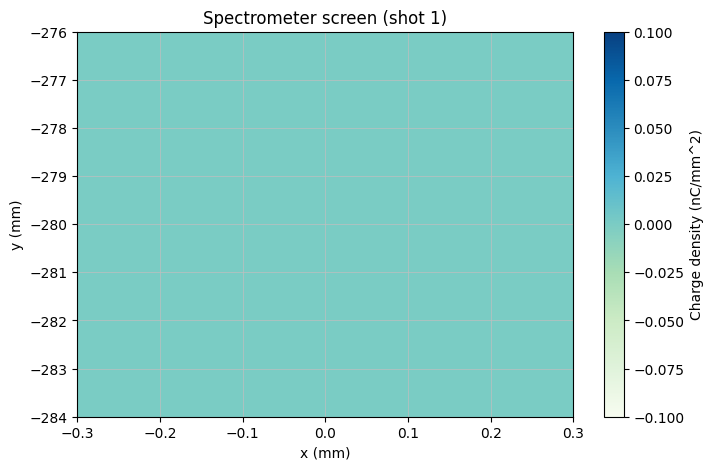

In [7]:
# plot the screen
experiment.plot_spectrometer_screen()
experiment.plot_spectrometer_screen(xlims=[-0.3e-3, 0.3e-3], ylims=[-284e-3, -276e-3])

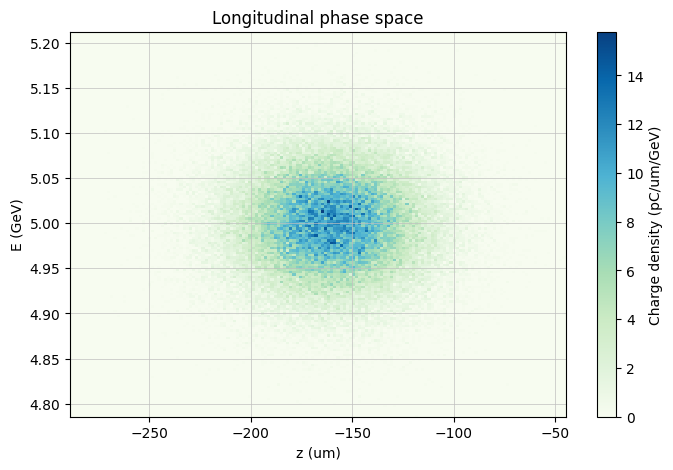

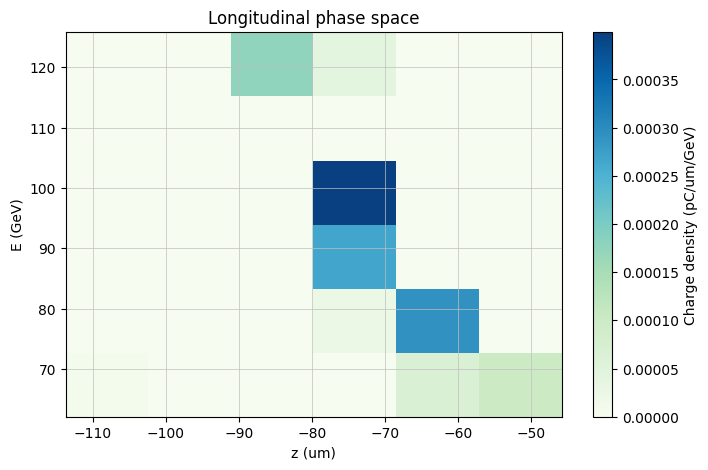

In [8]:
# plot the longitudinal phase space (at the beginning and end of the stage)
experiment.get_beam(0).plot_lps()
experiment.get_beam(-2).plot_lps()

In [9]:
#experiment.plot_evolution(use_stage_nums=False)